<a href="https://colab.research.google.com/github/noelmt7/AML_Stock_price_prediction/blob/main/BRK_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install yfinance
!pip install plotly

In [2]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
df_FORD = yf.Ticker("F").history(period="6y")
df_BRK = yf.Ticker("BRK-A").history(period="6y")
df_JPM = yf.Ticker("JPM").history(period="6y")
import datetime
from datetime import date,timedelta
from dateutil.relativedelta import relativedelta
import plotly.graph_objects as go

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
print("Ford HEAD")
print(df_FORD.head())
print("BRK HEAD")
print(df_BRK.head())
print("JPM HEAD")
print(df_JPM.head())

Ford HEAD
                               Open      High       Low     Close     Volume  \
Date                                                                           
2018-01-24 00:00:00-05:00  9.001507  9.069019  8.941497  9.039014   63300500   
2018-01-25 00:00:00-05:00  8.948998  8.948998  8.581436  8.678952  114886800   
2018-01-26 00:00:00-05:00  8.693954  8.776468  8.626443  8.738961   52496000   
2018-01-29 00:00:00-05:00  8.777394  8.815824  8.539128  8.546814   55114000   
2018-01-30 00:00:00-05:00  8.523754  8.631357  8.493010  8.500696   52068200   

                           Dividends  Stock Splits  
Date                                                
2018-01-24 00:00:00-05:00       0.00           0.0  
2018-01-25 00:00:00-05:00       0.00           0.0  
2018-01-26 00:00:00-05:00       0.00           0.0  
2018-01-29 00:00:00-05:00       0.28           0.0  
2018-01-30 00:00:00-05:00       0.00           0.0  
BRK HEAD
                               Open      High    

In [4]:
print("Ford null values")
print(df_FORD.isnull().sum())
print("BRK null values")
print(df_BRK.isnull().sum())
print("JPM null values")
print(df_JPM.isnull().sum())


Ford null values
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
BRK null values
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
JPM null values
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [5]:
print("Ford Stock Data:")
print(df_FORD.info())
print("\nBRK Stock Data:")
print(df_BRK.info())
print("\nJPM Stock Data:")
print(df_JPM.info())

Ford Stock Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2018-01-24 00:00:00-05:00 to 2024-01-24 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1510 non-null   float64
 1   High          1510 non-null   float64
 2   Low           1510 non-null   float64
 3   Close         1510 non-null   float64
 4   Volume        1510 non-null   int64  
 5   Dividends     1510 non-null   float64
 6   Stock Splits  1510 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 94.4 KB
None

BRK Stock Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2018-01-24 00:00:00-05:00 to 2024-01-24 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1510 non-null   float64
 1   High          1510 non-null   float64
 2   Low           1510 non-null   float64


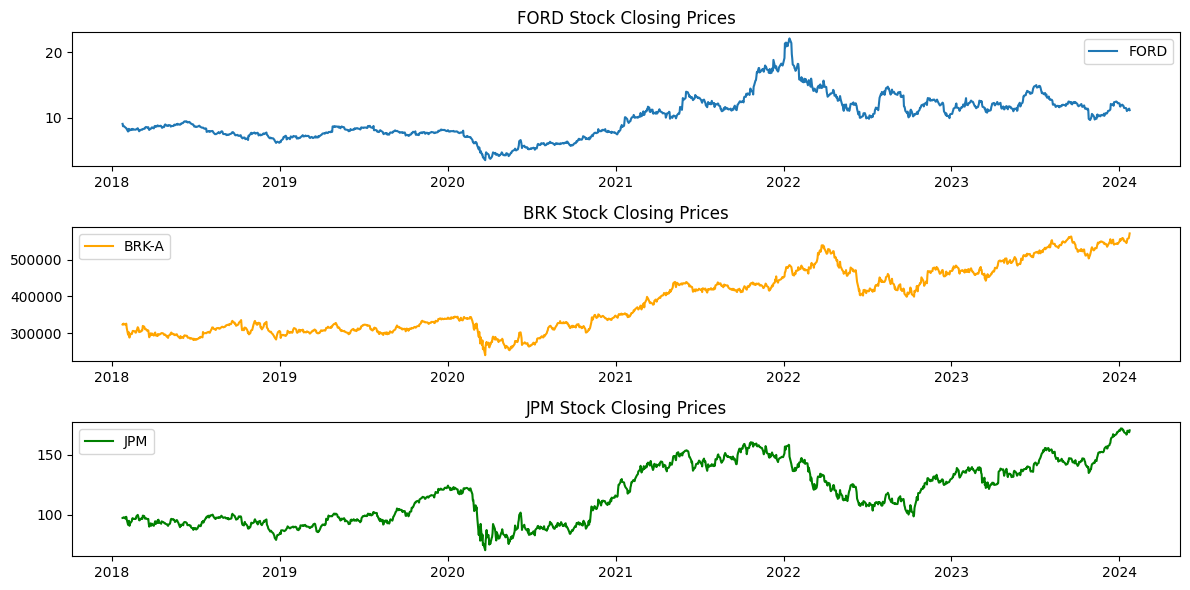

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(df_FORD['Close'], label='FORD')
plt.title('FORD Stock Closing Prices')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_BRK['Close'], label='BRK-A', color='orange')
plt.title('BRK Stock Closing Prices')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_JPM['Close'], label='JPM', color='green')
plt.title('JPM Stock Closing Prices')
plt.legend()

plt.tight_layout()
plt.show()

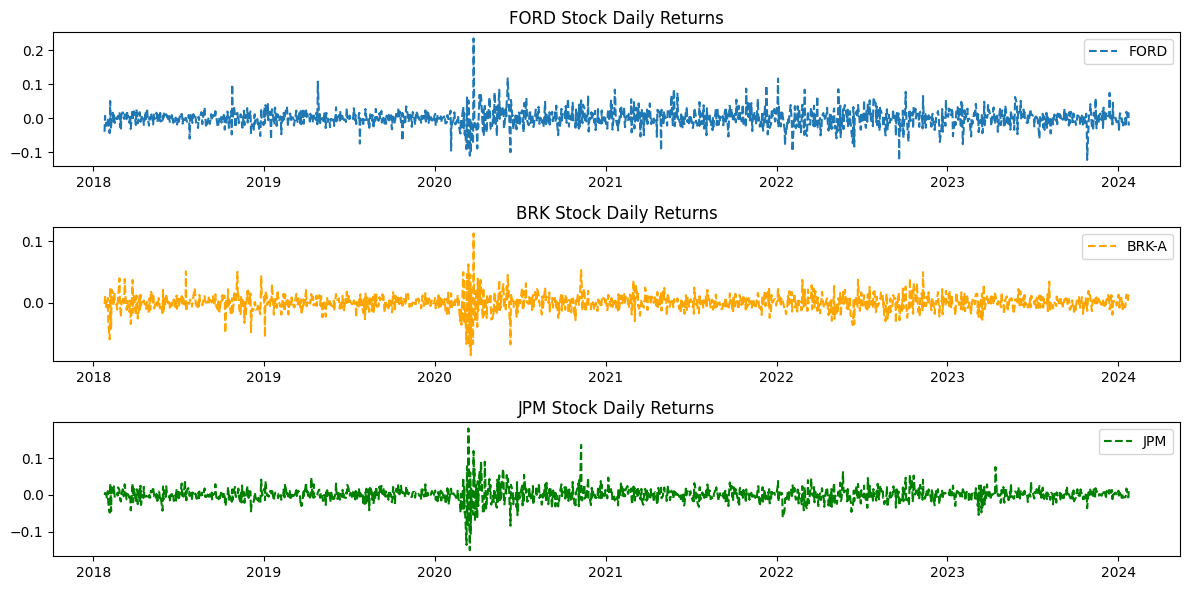

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(df_FORD['Close'].pct_change(), label='FORD', linestyle='--')
plt.title('FORD Stock Daily Returns')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_BRK['Close'].pct_change(), label='BRK-A', color='orange', linestyle='--')
plt.title('BRK Stock Daily Returns')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_JPM['Close'].pct_change(), label='JPM', color='green', linestyle='--')
plt.title('JPM Stock Daily Returns')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
print("\nFord Shape:")
print(f'Shape :{df_FORD.shape}')
print("\nBRK Shape:")
print(f'Shape :{df_BRK.shape}')
print("\nJPM Shape:")
print(f'Shape :{df_JPM.shape}')


Ford Shape:
Shape :(1510, 7)

BRK Shape:
Shape :(1510, 7)

JPM Shape:
Shape :(1510, 7)


In [9]:

# Function to create candlestick chart
def plot_candlestick(data, title):
    candlestick = go.Candlestick(x=data.index,
                                 open=data['Open'],
                                 high=data['High'],
                                 low=data['Low'],
                                 close=data['Close'])

    fig = go.Figure(data=[candlestick])

    fig.update_layout(title=title,
                      xaxis_title='Date',
                      yaxis_title='Stock Price',
                      xaxis_rangeslider_visible=False)

    fig.show()

# Plot candlestick charts for each stock
plot_candlestick(df_FORD, 'FORD Stock Candlestick Chart')
plot_candlestick(df_BRK, 'BRK Stock Candlestick Chart')
plot_candlestick(df_JPM, 'JPM Stock Candlestick Chart')

In [10]:
df = pd.DataFrame(df_BRK)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-24 00:00:00-05:00,323551.0,325230.0,322000.0,323480.0000,300,0.0,0.0
2018-01-25 00:00:00-05:00,324600.0,324600.0,321520.0,322850.0000,200,0.0,0.0
2018-01-26 00:00:00-05:00,323100.0,325915.0,323100.0,325915.0000,400,0.0,0.0
2018-01-29 00:00:00-05:00,325650.0,326350.0,322910.0,323500.0000,200,0.0,0.0
2018-01-30 00:00:00-05:00,322480.0,324915.0,322155.0,323000.0000,900,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-18 00:00:00-05:00,546102.0,549850.0,543375.0,549477.0000,7800,0.0,0.0
2024-01-19 00:00:00-05:00,549451.0,558685.0,547750.0,556710.0000,8800,0.0,0.0
2024-01-22 00:00:00-05:00,557031.0,560960.0,555730.0,558316.0000,11600,0.0,0.0


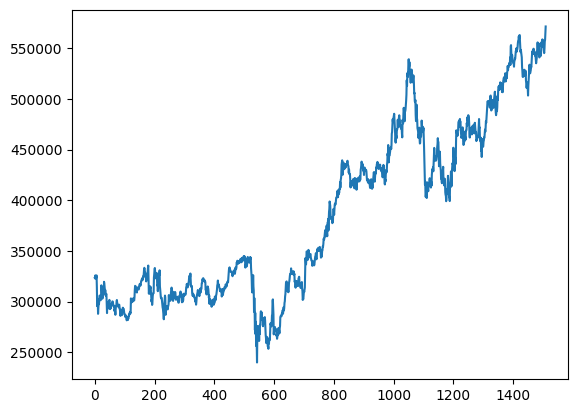

In [11]:
df2 = df.reset_index()['Close']
plt.plot(df2)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2.shape

(1510, 1)

In [13]:
train_size = int(len(df2)*0.65)
test_size = len(df2) - train_size
train_data,test_data = df2[0:train_size,:],df2[train_size:len(df2),:1]

In [14]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [15]:
# calling the create dataset function to split the data into
# input output datasets with time step 100
time_step = 200
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)
# checking values
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)

(780, 200)
[[0.25180904 0.24990871 0.25915397 ... 0.20635491 0.2531815  0.26257759]
 [0.24990871 0.25915397 0.25186937 ... 0.2531815  0.26257759 0.27567178]
 [0.25915397 0.25186937 0.25036117 ... 0.26257759 0.27567178 0.28112844]
 ...
 [0.38549587 0.37578306 0.41552413 ... 0.56165361 0.57260314 0.56528837]
 [0.37578306 0.41552413 0.41576544 ... 0.57260314 0.56528837 0.56829572]
 [0.41552413 0.41576544 0.4273635  ... 0.56528837 0.56829572 0.58819792]]
(328, 200)
(328,)


In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dropout

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 200, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 200,batch_size = 32,verbose = 2)

Epoch 1/200
25/25 - 12s - loss: 3.9142e-04 - val_loss: 8.2977e-04 - 12s/epoch - 485ms/step
Epoch 2/200
25/25 - 6s - loss: 3.9198e-04 - val_loss: 9.1382e-04 - 6s/epoch - 252ms/step
Epoch 3/200
25/25 - 7s - loss: 3.5835e-04 - val_loss: 4.3634e-04 - 7s/epoch - 284ms/step
Epoch 4/200
25/25 - 6s - loss: 3.9268e-04 - val_loss: 0.0013 - 6s/epoch - 251ms/step
Epoch 5/200
25/25 - 7s - loss: 3.4662e-04 - val_loss: 6.6921e-04 - 7s/epoch - 283ms/step
Epoch 6/200
25/25 - 6s - loss: 3.3160e-04 - val_loss: 9.9357e-04 - 6s/epoch - 256ms/step
Epoch 7/200
25/25 - 8s - loss: 3.1053e-04 - val_loss: 5.0174e-04 - 8s/epoch - 308ms/step
Epoch 8/200
25/25 - 7s - loss: 3.2038e-04 - val_loss: 6.7335e-04 - 7s/epoch - 293ms/step
Epoch 9/200
25/25 - 6s - loss: 2.9914e-04 - val_loss: 9.4613e-04 - 6s/epoch - 248ms/step
Epoch 10/200
25/25 - 7s - loss: 3.1220e-04 - val_loss: 8.0374e-04 - 7s/epoch - 284ms/step
Epoch 11/200
25/25 - 6s - loss: 3.4914e-04 - val_loss: 0.0017 - 6s/epoch - 251ms/step
Epoch 12/200
25/25 - 7s -

In [37]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 62ms/step


In [38]:
# transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [39]:
import math

In [25]:
# print(math.sqrt(mean_squared_error(X_train,train_predict)))
# print(math.sqrt(mean_squared_error(X_test,test_predict)))

In [40]:
look_back = 200

In [41]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict)+look_back,:] = train_predict

In [42]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:,:] = np.nan
print("Shapes - testPredictPlot:", testPredictPlot.shape, "test_predict:", test_predict.shape)
testPredictPlot[len(train_predict) + (look_back) * 2 + 1 : len(df2) - 1, :] = test_predict

Shapes - testPredictPlot: (1510, 1) test_predict: (328, 1)


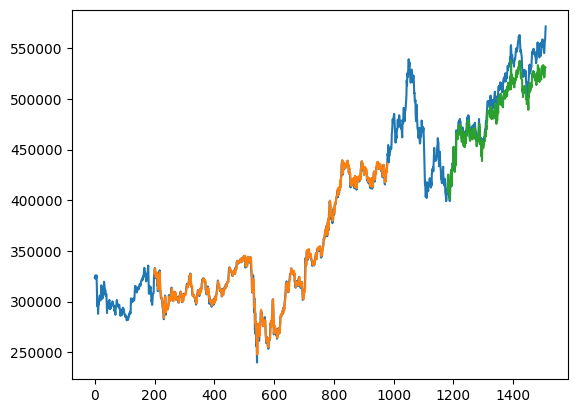

In [43]:
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
model.save('Predict_BRKA_lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [34]:
# converting categorical variables in y_train to numerical variables
Y_test_E = pd.get_dummies(Y_test).values
print('Shape of Label tensor: ', Y_test_E.shape)

Shape of Label tensor:  (328, 320)


In [35]:
from keras.models import load_model

model = load_model('Predict_BRKA_lstm.h5')
scores = model.evaluate(X_test, Y_test_E)
print(type(scores))
LSTM_accuracy = scores * 100
print('Test accuracy: ',round(LSTM_accuracy), '%')

11/11 [==============================] - 2s 61ms/step - loss: 0.5585
<class 'float'>
Test accuracy:  56 %


# **ARIMA**

In [ ]:
# Fetch Amaznon AMZN stock data and arrange
ticker = yf.Ticker('BRK-A')
df = ticker.history(period= '6y')
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date']).dt.date #the Date is object type, so we will convert it to datatime
df = df.iloc[:,0:5]
df

In [ ]:
# for ARIMA we will only use one variable 'open'
adf = df.iloc[:,[0,1]]
adf.head()

In [ ]:
print('There are {} number of records in the dataset.'.format(df.shape[0]))

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
plt.plot(adf['Date'], adf['Open'], label='Amazon stock price', color = 'purple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BRK-A Stock Price')
plt.legend()
plt.show()

In [ ]:
df_close = df['Close']
plt.figure(figsize=(10,10))
plt.title("Probability Distribution")
df_close.plot(kind='kde', color = 'purple')

ADF (Augmented Dickey-Fuller) Test

One of the most widely used statistical tests is the Dickey-Fuller test. It can be used to determine whether or not a series has a unit root, and thus whether or not the series is stationary. This test’s null and alternate hypotheses are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this.

The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance).

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(12,10))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

#To separate the trend and the seasonality from a time series,
# we can decompose the series using the following code.

result = seasonal_decompose(df_close, model='multiplicative', period=30)
plt.figure(figsize=(12,10))
fig = result.plot()
plt.show()

In [ ]:
dfa = df[['Date','Close']]

In [ ]:

import pmdarima

from pmdarima.arima import auto_arima

# we will set (p,d,q)start = 0 and (p,d,q)max = 2
arima_model = auto_arima(dfa['Close'], start_p = 0, d=0, start_q = 0,
                          max_p = 5, max_d=2, max_q = 3,
                          seasonal = False, # there is no seasonality
                          trace = True,
                          test = 'adf', # this will find optimal 'd'
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True, n_fits=50)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame


series = dfa['Close']
model_ARIMA = ARIMA(series, order=(3, 0, 2))
model_fit = model_ARIMA.fit()
print(model_fit.summary())


In [ ]:
series = dfa['Close']
X = series.values
size = int(len(X) * 0.60)
train, test = X[0:size], X[size:len(X)]


In [ ]:

history = [x for x in train]
predictions = list()

#we predict the next value and use that prediction back in training data to predict next value
for i in range(len(test)):
    model = ARIMA(history, order=(3,0,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    new = test[i]
    history.append(new)

df['ARIMA'] = pd.DataFrame(predictions)

In [ ]:

# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 8), dpi=200)
plt.plot(test, color='Blue', label='Actual')
plt.plot(predictions, color='Orange', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 2: ARIMA model on Test Set')
plt.legend()
plt.show()